# Predict CLTV

## Data Understanding & Cleaning

### Import Library

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Data Understanding

In [86]:
df = pd.read_csv('Telco_customer_churn.csv', sep=';')
pd.options.display.max_columns = None
df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,"70,005",Yes,"106,81667","-6,20000","4210,7"
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,"91,91",Yes,"106,81667","-6,20000","3511,3"
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,"129,545",Yes,"106,81667","-6,20000","6983,6"
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,"136,24",Yes,"106,81667","-6,20000","6503,9"
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,"134,81",Yes,"106,81667","-6,20000",6942


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Customer ID                   7043 non-null   int64 
 1   Tenure Months                 7043 non-null   int64 
 2   Location                      7043 non-null   object
 3   Device Class                  7043 non-null   object
 4   Games Product                 7043 non-null   object
 5   Music Product                 7043 non-null   object
 6   Education Product             7043 non-null   object
 7   Call Center                   7043 non-null   object
 8   Video Product                 7043 non-null   object
 9   Use MyApp                     7043 non-null   object
 10  Payment Method                7043 non-null   object
 11  Monthly Purchase (Thou. IDR)  7043 non-null   object
 12  Churn Label                   7043 non-null   object
 13  Longitude         

In [88]:
df.isnull().sum()

Customer ID                     0
Tenure Months                   0
Location                        0
Device Class                    0
Games Product                   0
Music Product                   0
Education Product               0
Call Center                     0
Video Product                   0
Use MyApp                       0
Payment Method                  0
Monthly Purchase (Thou. IDR)    0
Churn Label                     0
Longitude                       0
Latitude                        0
CLTV (Predicted Thou. IDR)      0
dtype: int64

In [89]:
df[df.duplicated()]

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)


### Data Manipulation

In [90]:
df['Monthly Purchase (Thou. IDR)'] = df['Monthly Purchase (Thou. IDR)'].str.replace(',', '.').astype(float)
df['CLTV (Predicted Thou. IDR)'] = df['CLTV (Predicted Thou. IDR)'].str.replace(',', '.').astype(float)

In [91]:
df[['Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)']].head()

,Monthly Purchase (Thou. IDR),CLTV (Predicted Thou. IDR)
0,70.005,4210.7
1,91.910,3511.3
2,129.545,6983.6
3,136.240,6503.9
4,134.810,6942.0


## EDA

In [92]:
df.describe()

,Customer ID,Tenure Months,Monthly Purchase (Thou. IDR),CLTV (Predicted Thou. IDR)
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,32.371149,84.190200,5720.384481
std,2033.283305,24.559481,39.117061,1537.974298
min,0.000000,0.000000,23.725000,2603.900000
25%,1760.500000,9.000000,46.150000,4509.700000
50%,3521.000000,29.000000,91.455000,5885.100000
75%,5281.500000,55.000000,116.805000,6994.650000
max,7042.000000,72.000000,154.375000,8450.000000


In [93]:
def plot_box(data, labels, title):
    sns.set_style("whitegrid")
    plt.figure(figsize=(10,5))
    ax = sns.boxplot(data=data, orient='h', showmeans=True)
    ax.set_xlabel('Value')
    ax.set_title(title)
    ax.set_yticklabels(labels)
    plt.show()

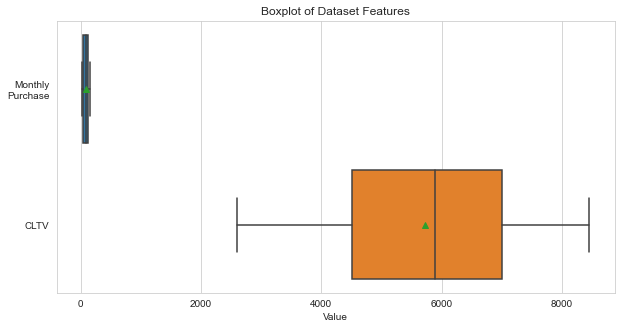

In [94]:
plot_box(data=[df['Monthly Purchase (Thou. IDR)'], df['CLTV (Predicted Thou. IDR)']],
         labels=['Monthly\nPurchase', 'CLTV'],
         title='Boxplot of Dataset Features')

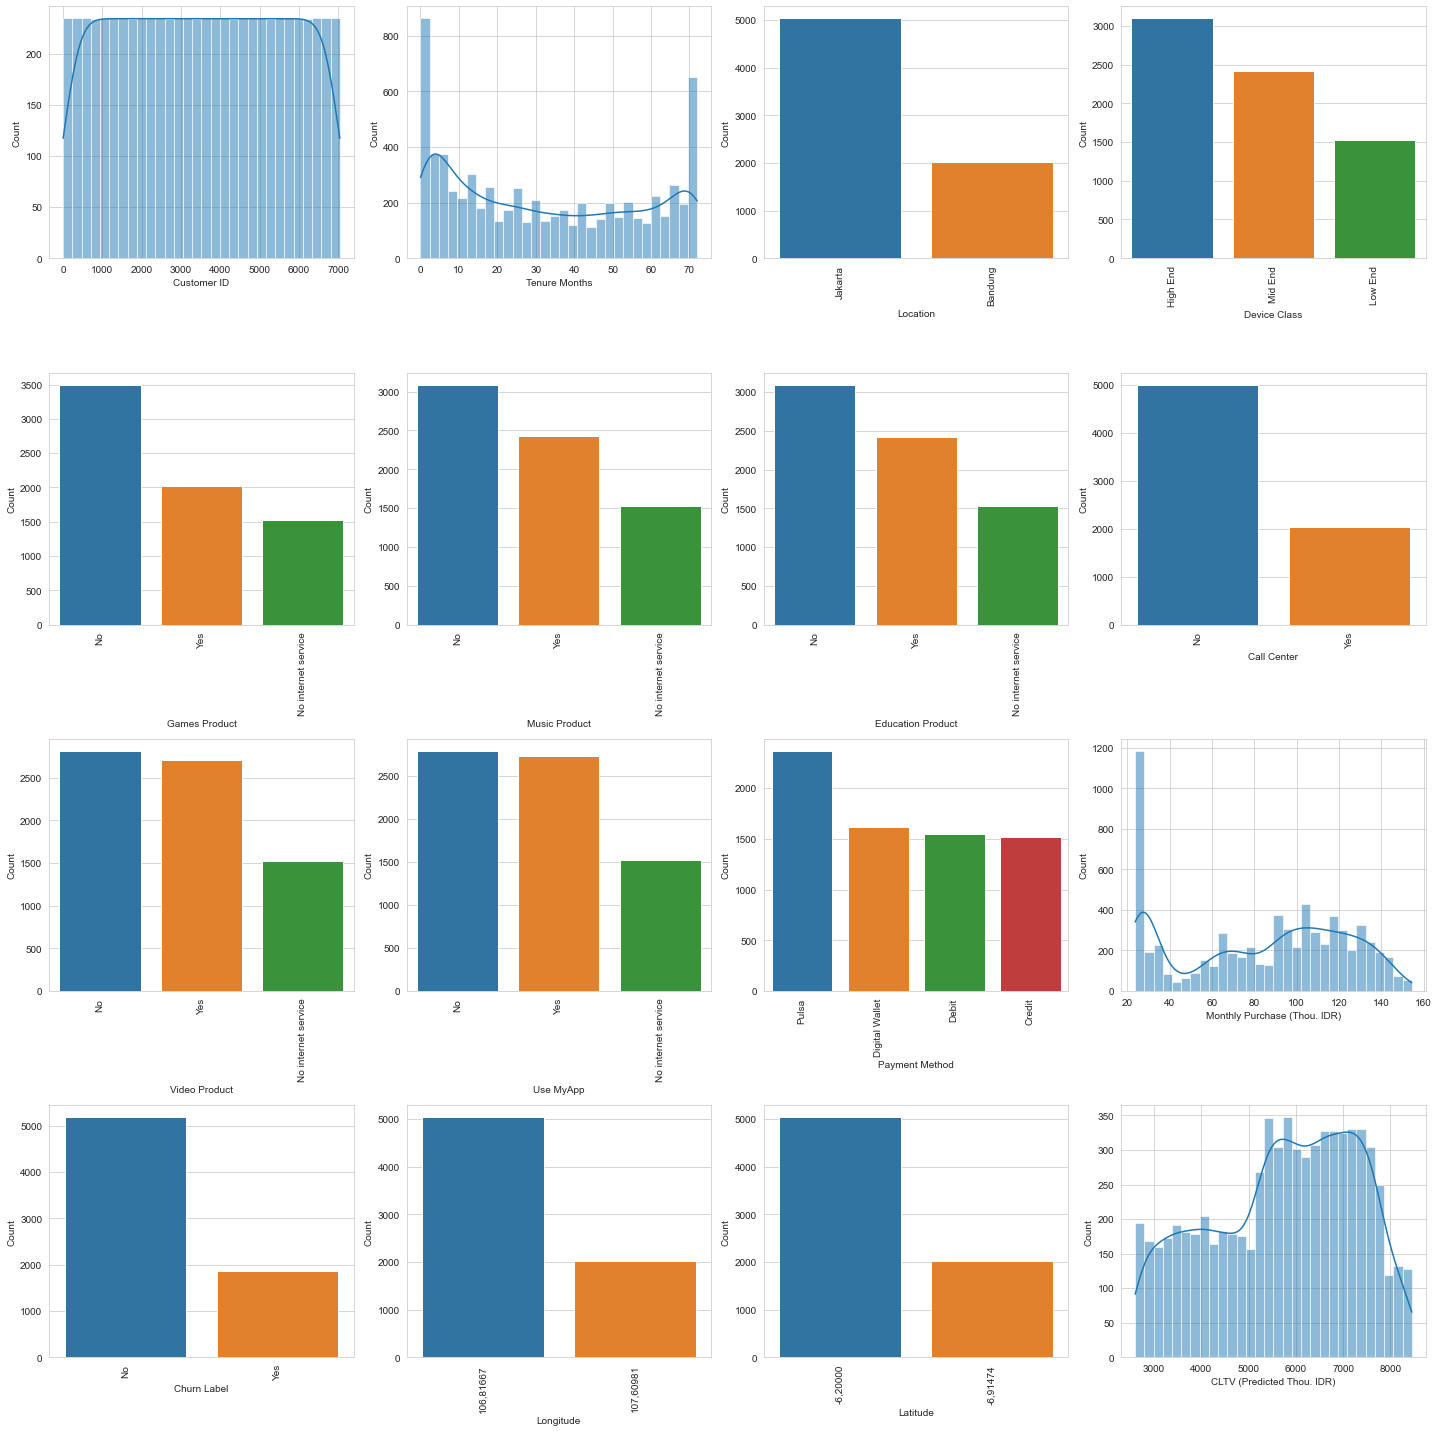

In [95]:
# Mengatur subplot dengan 4 baris dan 4 kolom
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
fig.subplots_adjust(wspace=0.5, hspace=0.5)  # Mengatur jarak antara subplot

# Loop melalui setiap kolom dalam DataFrame dan membuat plot distribusi
for i, column in enumerate(df.columns):
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        sns.histplot(data=df, x=column, kde=True, bins=30, ax=axes[i // 4, i % 4])
        axes[i // 4, i % 4].set_xlabel(column)
        axes[i // 4, i % 4].set_ylabel('Count')
    else:
        sns.countplot(data=df, x=column, order=df[column].value_counts().index, ax=axes[i // 4, i % 4])
        axes[i // 4, i % 4].set_xlabel(column)
        axes[i // 4, i % 4].set_ylabel('Count')
        axes[i // 4, i % 4].tick_params(axis='x', rotation=90)  # Untuk menghindari overlap pada label
plt.tight_layout()
plt.show()

### Multikolinearitas

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant

X = df[['Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)']]
X = add_constant(X)

# VIF dataframe
vif_data = pd.DataFrame()

# Hitung VIF tiap fitur
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data = vif_data[vif_data['feature'] != 'const']

display(vif_data)

,feature,VIF
1,Monthly Purchase (Thou. IDR),1.009836
2,CLTV (Predicted Thou. IDR),1.009836


## Feature Engineering

### Label Encoding

In [97]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
columns = ['Location', 'Device Class', 'Games Product', 'Music Product', 'Education Product',
                     'Call Center', 'Video Product', 'Use MyApp', 'Payment Method', 'Churn Label']

# Label encoding untuk setiap kolom
for col in columns:
    df[col] = le.fit_transform(df[col])

### Scaling Features Dataset

In [98]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
col = ['Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)']
df[col] = scaler.fit_transform(df[col])

### Heatmap

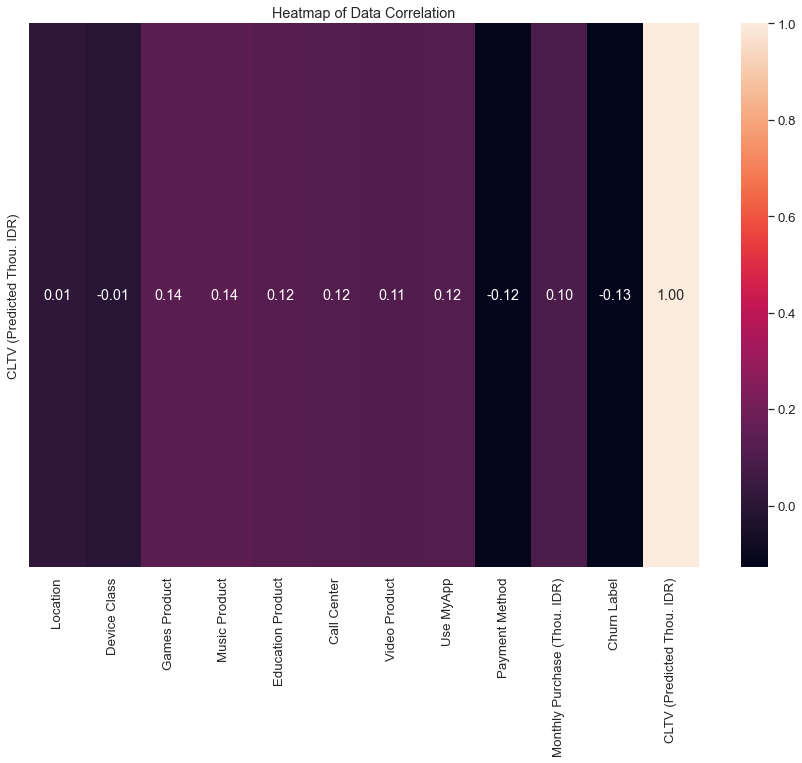

In [126]:
corr = df.corr()
plt.figure(figsize=(15, 10)) 
sns.set(font_scale=1.2)  

sns.heatmap(corr.loc[['CLTV (Predicted Thou. IDR)']], annot=True, fmt=".2f")

plt.title('Heatmap of Data Correlation')
plt.show()

In [100]:
df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,1,2,2,2,0,0,0,0,2,0.354229,1,"106,81667","-6,20000",0.274850
1,1,2,1,0,0,0,0,0,0,0,3,0.521891,1,"106,81667","-6,20000",0.155215
2,2,8,1,0,0,0,2,0,2,2,3,0.809950,1,"106,81667","-6,20000",0.749166
3,3,28,1,0,0,0,2,1,2,2,3,0.861194,1,"106,81667","-6,20000",0.667111
4,4,49,1,0,0,2,2,0,2,2,1,0.850249,1,"106,81667","-6,20000",0.742050


In [101]:
df_drop = df[["Customer ID", "Tenure Months", "Longitude", "Latitude"]]

In [102]:
df = df.drop(["Customer ID", "Tenure Months", "Longitude", "Latitude"], axis=1)

In [103]:
df = df[:].astype(float)

In [104]:
df

,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,CLTV (Predicted Thou. IDR)
0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,2.0,0.354229,1.0,0.274850
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.521891,1.0,0.155215
2,1.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,3.0,0.809950,1.0,0.749166
3,1.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,3.0,0.861194,1.0,0.667111
4,1.0,0.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,0.850249,1.0,0.742050
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.028856,0.0,0.734490
7039,1.0,2.0,2.0,0.0,2.0,1.0,2.0,2.0,2.0,0.662189,0.0,0.030465
7040,1.0,0.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,0.845274,0.0,0.790972
7041,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.112935,0.0,0.175673


## Modelling

In [105]:
from sklearn.model_selection import train_test_split

X = df.drop('CLTV (Predicted Thou. IDR)', axis=1)
y = df['CLTV (Predicted Thou. IDR)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [136]:
def rounded_value(value) :
    value = round(value, 5)
    return value*100

### Linear Regression

In [106]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

In [137]:
from sklearn.metrics import mean_squared_error, r2_score

mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"MSE : {rounded_value(mse_lr)}")

r2_lr = r2_score(y_test, y_pred_lr)
print(f'R-Squared : {rounded_value(r2_lr)}')

MSE : 6.487
R-Squared : 5.029


In [108]:
# import seaborn as sns

# sns.kdeplot(y_test, label='y_test')
# sns.kdeplot(y_pred_lr, label='y_pred')
# plt.xlabel('Value')
# plt.ylabel('Density')
# plt.title('Comparison y_test vs y_pred')
# plt.legend()
# plt.show()

### Ridge and Lasso Regression

#### Lasso Regression

In [109]:
from sklearn.linear_model import LassoCV

# Buat alpha dengan rentang 0 s.d 1 dengan panjang langkah 0.01 (0, 0.01, 0.02, ... , 0.09, 1)
alpha = np.arange(0, 10, 0.01)

# Lasso Cross validation
lasso_cv = LassoCV(alphas = alpha)
lasso_cv.fit(X_train, y_train)

# Koefisien determinasi
train_score_lasso = lasso_cv.score(X_train, y_train)
test_score_lasso = lasso_cv.score(X_test, y_test)

c:\Users\marse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\marse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\marse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\marse\AppData\Local\Progr

c:\Users\marse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\marse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137.26948351499502, tolerance: 0.029320615115860944
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\marse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1712: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X, y)
c:\Users\marse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\

In [110]:
# print(f"R-Squared Data Training : {train_score_lasso}")
# print(f"R-Squared Data Testing : {test_score_lasso}")

In [138]:
y_predict_lassocv = lasso_cv.predict(X_test)
mse_lassocv = mean_squared_error(y_test, y_predict_lassocv)
r2_lassocv = r2_score(y_test, y_predict_lassocv)

print(f"MSE (Lasso Regression CV) = {rounded_value(mse_lassocv)}")
print(f"R-Squared (Lasso Regression CV) = {rounded_value(r2_lassocv)}")

MSE (Lasso Regression CV) = 6.487
R-Squared (Lasso Regression CV) = 5.029


#### Ridge Regression

In [139]:
from sklearn.linear_model import RidgeCV

alpha = np.arange(1, 10, 0.1)

#Lasso Cross validation
ridge_cv = RidgeCV(alphas = alpha)
ridge_cv.fit(X_train, y_train)

# Hitung koefisien determinasi
train_score_ridge = ridge_cv.score(X_train, y_train)
test_score_ridge = ridge_cv.score(X_test, y_test)

# print(f"R-Squared Data Training : {train_score_ridge}")
# print(f"R-Squared Data Testing : {test_score_ridge}")

In [140]:
y_predict_ridgecv = ridge_cv.predict(X_test)
mse_ridgecv = mean_squared_error(y_test, y_predict_ridgecv)
r2_ridgecv = r2_score(y_test, y_predict_ridgecv)

print(f"MSE (Ridge Regression CV) = {rounded_value(mse_ridgecv)}")
print(f"R-Squared (Ridge Regression CV) = {rounded_value(r2_ridgecv)}")

MSE (Ridge Regression CV) = 6.487
R-Squared (Ridge Regression CV) = 5.026


### Decision Tree Regressor

In [141]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

# Hitung nilai MSE & r2
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'MSE: {rounded_value(mse_dt)}')
print(f'R-Squared: {rounded_value(r2_dt)}')

MSE: 12.128
R-Squared: -77.561


In [115]:
# sns.kdeplot(y_test, label='y_test')
# sns.kdeplot(y_pred_dt, label='y_pred')
# plt.xlabel('Value')
# plt.ylabel('Density')
# plt.title('Decision Tree Regression\nComparison Between y_test vs y_pred')
# plt.legend()
# plt.show()

### Random Forest Regressor

In [142]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

mse_rfr = mean_squared_error(y_test, y_pred_rf)
r2_rfr = r2_score(y_test, y_pred_rf)

print(f'MSE: {rounded_value(mse_rfr)}')
print(f'R-Squared: {rounded_value(r2_rfr)}')

MSE: 8.021
R-Squared: -17.424999999999997


In [117]:
# sns.kdeplot(y_test, label='y_test')
# sns.kdeplot(y_pred_rf, label='y_pred')
# plt.xlabel('Value')
# plt.ylabel('Density')
# plt.title('Random Forest Regression\nComparison Between y_test vs y_pred')
# plt.legend()
# plt.show()

### XGBoost Regressor

In [143]:
from xgboost import XGBRegressor

model_xgboost = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
model_xgboost.fit(X_train, y_train)
y_pred_xgboost = model_xgboost.predict(X_test)

# Hitung nilai MSE pada set pengujian
mse_xgbr = mean_squared_error(y_test, y_pred_xgboost)
r2_xgbr = r2_score(y_test, y_pred_xgboost)

print(f'MSE: {rounded_value(mse_xgbr)}')
print(f'R-Squared: {rounded_value(r2_xgbr)}')

MSE: 6.529999999999999
R-Squared: 4.3950000000000005


In [119]:
# sns.kdeplot(y_test, label='y_test')
# sns.kdeplot(y_pred_xgboost, label='y_pred')
# plt.xlabel('Value')
# plt.ylabel('Density')
# plt.title('XGBoost Regressor\nComparison Between y_test vs y_pred')
# plt.legend()
# plt.show()

### SVR (Support Vector Regressor)

In [144]:
from sklearn.svm import SVR

model_svm = SVR(kernel='linear')
model_svm.fit(X_train, y_train)
y_pred_svr = model_svm.predict(X_test)

# Hitung nilai MSE pada set pengujian
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'MSE: {rounded_value(mse_svr)}')
print(f'R-Squared: {rounded_value(r2_svr)}')

MSE: 6.517
R-Squared: 4.585


In [121]:
# sns.kdeplot(y_test, label='y_test')
# sns.kdeplot(y_pred_svr, label='y_pred')
# plt.xlabel('Value')
# plt.ylabel('Density')
# plt.title('Support Vector Regressor\nComparison Between y_test vs y_pred')
# plt.legend()
# plt.show()

### KNN Regressor

In [145]:
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

# Hitung nilai MSE pada set pengujian
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f'MSE: {rounded_value(mse_knn)}')
print(f'R-Squared: {rounded_value(r2_knn)}')

MSE: 7.720000000000001
R-Squared: -13.028999999999998


In [123]:
# sns.kdeplot(y_test, label='y_test')
# sns.kdeplot(y_pred_knn, label='y_pred')
# plt.xlabel('Value')
# plt.ylabel('Density')
# plt.title('KNN Regressor\nComparison Between y_test vs y_pred')
# plt.legend()
# plt.show()